In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### constants
LABELS = ["Normal", "Fraud"]
RANDOM_SEED = 105
TEST_SIZE = 0.2
DATASET_NAME = "creditcard.csv"

In [4]:
### data reading
df = pd.read_csv(DATASET_NAME)
#df.describe()

In [4]:
### amount of lines
#df['Class'].shape

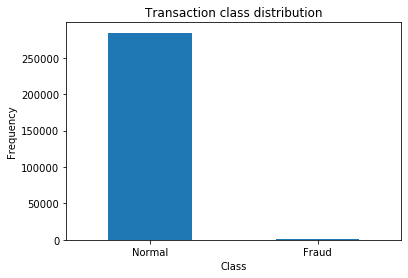

In [4]:
### describe dataset by classes
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [5]:
### data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### преобразуем данные, убираем колонку "время", т.к. она ни на что не влияет
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### отделяем X от Y
Y = data['Class'].values
X = data.drop(['Class'], axis=1).values

### делим данные
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=True)

In [6]:
### количество мошенничеств в тестовых данных
sum(Y_test)

89

In [6]:
### Creating model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [55]:
### train model
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [7]:
import joblib

file_name = 'model_200_newdatashape.pkl'

In [57]:
### saving model
with open(file_name, 'wb') as f:
    joblib.dump(model, f, compress=1)

In [8]:
### loading model
with open(file_name, 'rb') as f:
    model = joblib.load(file_name)

In [9]:
import numpy as np

predictions = model.predict(X_test)

In [10]:
TP, FP, TN, FN = 0, 0, 0, 0

for prediction, true_class in zip(predictions, Y_test):
    TP += int(true_class and prediction)
    FN += int(true_class and not prediction)
    FP += int(not true_class and prediction)
    TN += int(not true_class and not prediction)

In [11]:
print('TP:', TP)  # мошенничество, определено правильно
print('FP:', FP)  # нормальная транзакция, определена неправильно
print('TN:', TN)  # нормальная транзакция, определена правильно
print('FN:', FN)  # мошенничество, определено неправильно

TP: 71
FP: 6
TN: 56867
FN: 18


In [13]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(precision)
print(recall)

0.922077922077922
0.797752808988764


In [14]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, predictions, target_names=LABELS)
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56873
       Fraud       0.92      0.80      0.86        89

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
tpr = TP / (TP + FN)  # True positive rate
fpr = FP / (FP + TN)  # False positive rate

print(tpr)
print(fpr)

0.797752808988764
0.00010549821532185747


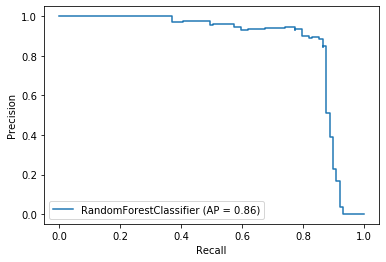

In [35]:
### Precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, Y_test)

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, predictions)

0.898823655386721

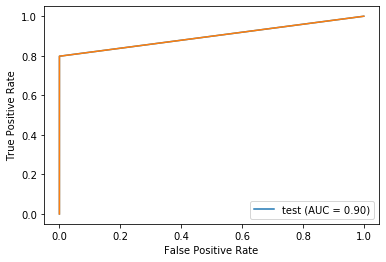

In [37]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)

viz = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=''
)
viz.plot(ax=None, name='test')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.show()

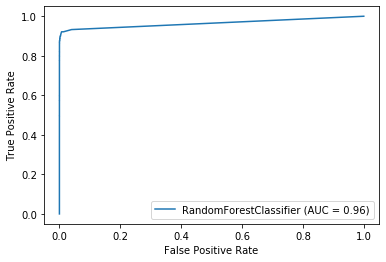

In [38]:
from sklearn.metrics import plot_roc_curve

svc_disp = plot_roc_curve(model, X_test, Y_test)